In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV







In [ ]:
df=pd.read_csv("/content/Supermarket_sales_prediction.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:

df['Outlet_Size'].fillna('Medium',inplace=True)

df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
correlation = df.corr()
correlation

<ipython-input-8-b6c2249924d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<ipython-input-9-97ecc473c129>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='coolwarm')


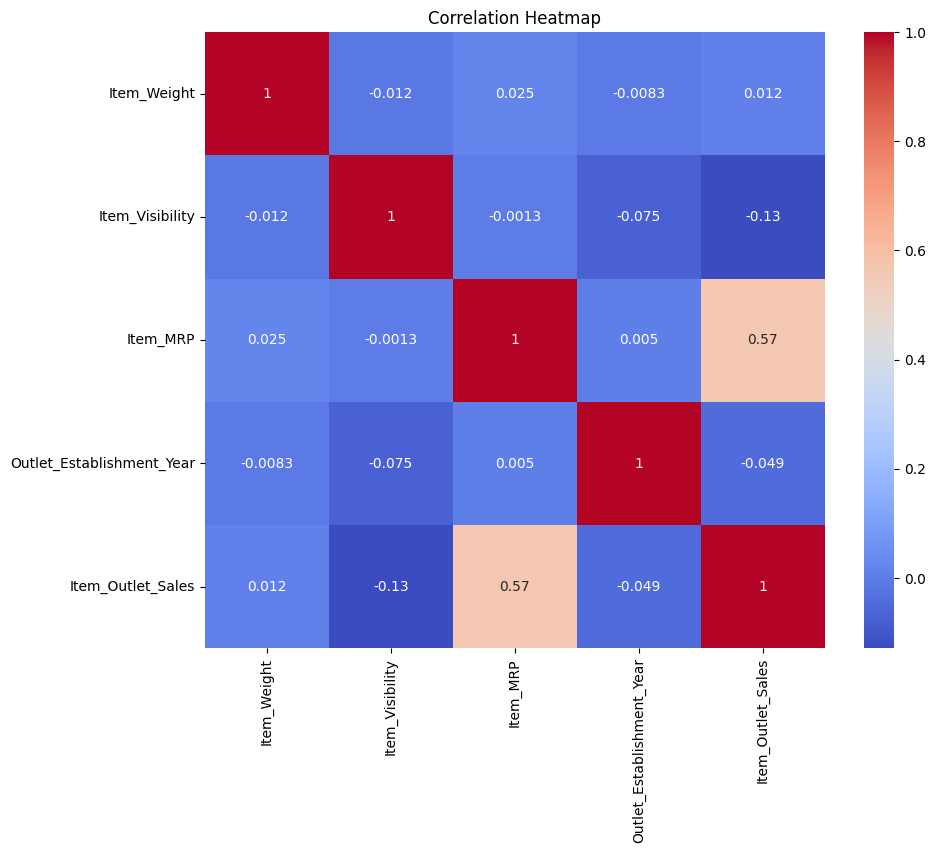

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

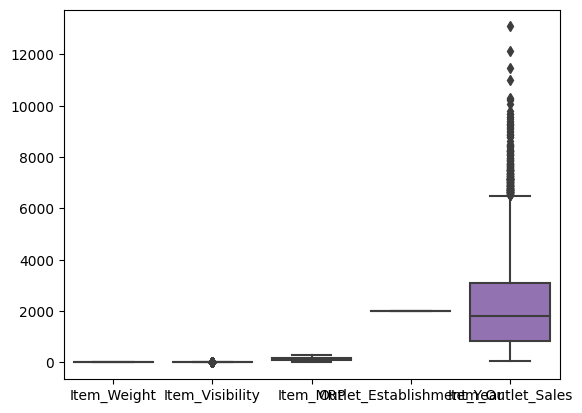

In [ ]:
sns.boxplot(df)

In [ ]:
Q3 = df.Item_Outlet_Sales.quantile(.75)
Q3

3101.2964

In [ ]:
Q1 = df.Item_Outlet_Sales.quantile(.25)
Q1

834.2474

In [ ]:
IQR_value = Q3 - Q1
IQR_value

2267.049

In [ ]:
lower_limit = Q1 - 1.5*IQR_value
lower_limit

-2566.3261

In [ ]:
upper_limit = Q3 + 1.5*IQR_value
upper_limit

6501.8699

In [ ]:
data=df[~((df.Item_Outlet_Sales<lower_limit)|(df.Item_Outlet_Sales>upper_limit))]
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8337 non-null   object 
 1   Item_Weight                8337 non-null   float64
 2   Item_Fat_Content           8337 non-null   object 
 3   Item_Visibility            8337 non-null   float64
 4   Item_Type                  8337 non-null   object 
 5   Item_MRP                   8337 non-null   float64
 6   Outlet_Identifier          8337 non-null   object 
 7   Outlet_Establishment_Year  8337 non-null   int64  
 8   Outlet_Size                8337 non-null   object 
 9   Outlet_Location_Type       8337 non-null   object 
 10  Outlet_Type                8337 non-null   object 
 11  Item_Outlet_Sales          8337 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 846.7+ KB


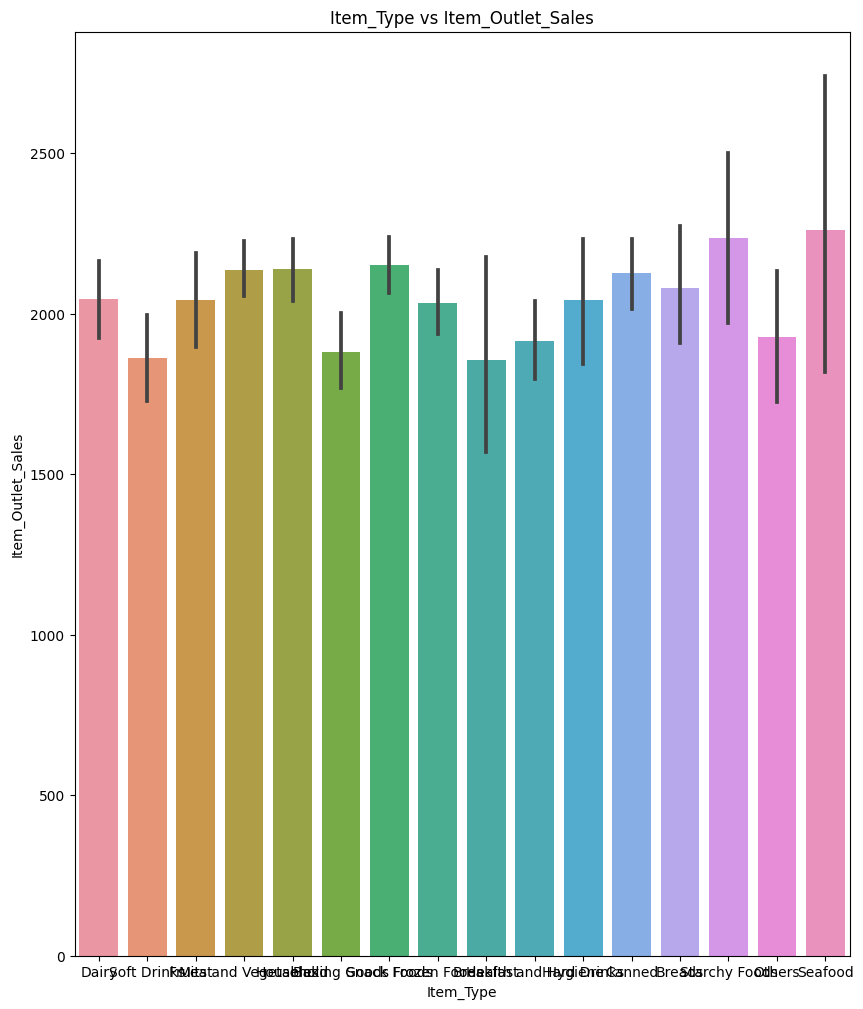

In [ ]:
plt.figure(figsize=(10, 12))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=data)
plt.title('Item_Type vs Item_Outlet_Sales')
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

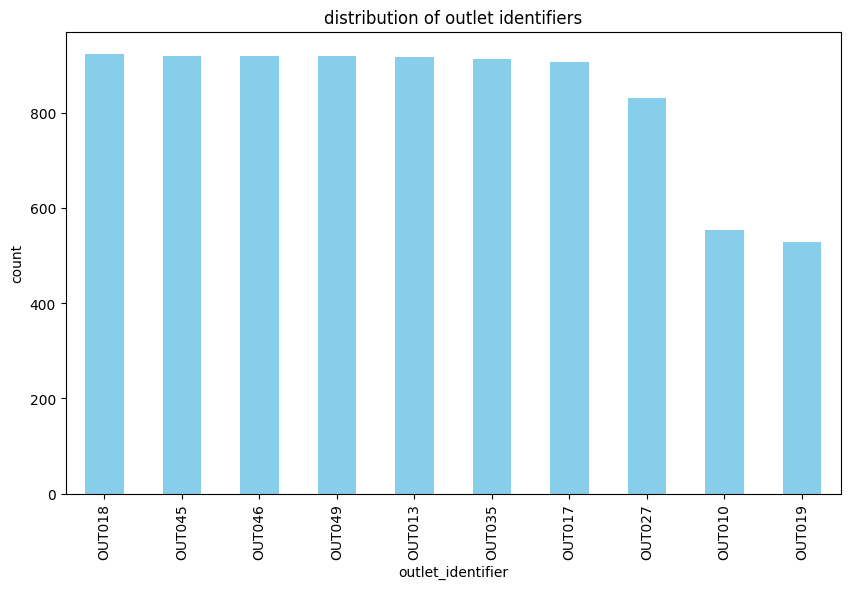

In [ ]:
plt.figure(figsize=(10,6))
data['Outlet_Identifier'].value_counts().plot(kind='bar',color='skyblue')
plt.title('distribution of outlet identifiers')
plt.xlabel('outlet_identifier')
plt.ylabel('count')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in data:
  data[i]=encoder.fit_transform(data[i])

<ipython-input-20-859987651ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=encoder.fit_transform(data[i])
<ipython-input-20-859987651ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=encoder.fit_transform(data[i])
<ipython-input-20-859987651ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Item_Identifier            8337 non-null   int64
 1   Item_Weight                8337 non-null   int64
 2   Item_Fat_Content           8337 non-null   int64
 3   Item_Visibility            8337 non-null   int64
 4   Item_Type                  8337 non-null   int64
 5   Item_MRP                   8337 non-null   int64
 6   Outlet_Identifier          8337 non-null   int64
 7   Outlet_Establishment_Year  8337 non-null   int64
 8   Outlet_Size                8337 non-null   int64
 9   Outlet_Location_Type       8337 non-null   int64
 10  Outlet_Type                8337 non-null   int64
 11  Item_Outlet_Sales          8337 non-null   int64
dtypes: int64(12)
memory usage: 846.7 KB


In [ ]:
data['outlet_age']=2023 - data['Outlet_Establishment_Year']
data

<ipython-input-22-822c18fb3dda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['outlet_age']=2023 - data['Outlet_Establishment_Year']


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet_age
0,156,284,1,655,4,5512,9,4,1,0,1,2540,2019
1,8,57,2,863,14,473,3,8,1,2,2,422,2015
2,662,376,1,705,10,2900,9,4,1,0,1,1639,2019
3,1121,393,2,0,6,4216,0,3,1,2,0,670,2020
4,1297,265,1,0,9,627,1,1,0,2,1,865,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,125,1,3827,13,4923,1,1,0,2,1,2047,2022
8519,897,233,2,3205,0,2023,7,5,1,1,1,516,2018
8520,1357,299,1,2252,8,1263,6,6,2,1,1,1018,2017
8521,681,149,2,7014,13,1857,3,8,1,2,2,1466,2015


In [ ]:
from sklearn.preprocessing import StandardScaler
x=data.drop("Item_Outlet_Sales",axis=1)
y=data['Item_Outlet_Sales']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

numerical_features = ['Item_Weight','Item_Visibility','Item_MRP','outlet_age']
categorical_features=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size']

numerical_transformer= StandardScaler()
categorical_transformer=OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
transformers=[('num', numerical_transformer, numerical_features),('cat', categorical_transformer, categorical_features) ])

model = RandomForestRegressor(random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])

PARAMS={'model__n_estimators':[50,100,200],
        'model__max_depth':[None,10,30],
        }
grid_search=GridSearchCV(pipeline,PARAMS,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)

best_param=grid_search.best_params_
best_rf_=grid_search.best_estimator_
print("best params:",best_param)
y_pred=grid_search.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae = mean_absolute_error(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')

print(f'Mean Absolute Error: {mae}')




best params: {'model__max_depth': 10, 'model__n_estimators': 100}
Root Mean Squared Error: 537.0768602916058
Mean Absolute Error: 410.7374668180303


In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.6238525632230727

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

xg=XGBRegressor()
xg.fit(x_train,y_train)
pre=xg.predict(x_test)
mse=mean_squared_error(y_test,pre)
mae=mean_absolute_error(y_test,pre)
r2=r2_score(y_test,pre)
print("mse:",mse)
print("mae:",mae)
print("r2:",r2)

mse: 329183.23407705524
mae: 433.55105778753614
r2: 0.5707375187591309


In [ ]:
!pip install catboost
from catboost import CatBoostRegressor

In [ ]:
cat=CatBoostRegressor()
cat.fit(x_train,y_train)
pred=cat.predict(x_test)
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)
print("mse:",mse)
print("mae:",mae)
print("r2:",r2)

Learning rate set to 0.055256
0:	learn: 857.5716100	total: 24.8ms	remaining: 24.8s
1:	learn: 830.2619148	total: 70.4ms	remaining: 35.1s
2:	learn: 805.4009694	total: 81.1ms	remaining: 26.9s
3:	learn: 782.3275608	total: 92.4ms	remaining: 23s
4:	learn: 760.6243042	total: 101ms	remaining: 20.1s
5:	learn: 740.2132623	total: 112ms	remaining: 18.5s
6:	learn: 721.1962715	total: 117ms	remaining: 16.5s
7:	learn: 704.9776130	total: 125ms	remaining: 15.5s
8:	learn: 689.8672285	total: 132ms	remaining: 14.5s
9:	learn: 675.0849751	total: 139ms	remaining: 13.8s
10:	learn: 661.5426643	total: 146ms	remaining: 13.2s
11:	learn: 649.8166425	total: 166ms	remaining: 13.6s
12:	learn: 639.4346742	total: 172ms	remaining: 13.1s
13:	learn: 628.7863693	total: 184ms	remaining: 13s
14:	learn: 619.5443451	total: 189ms	remaining: 12.4s
15:	learn: 610.5765001	total: 198ms	remaining: 12.2s
16:	learn: 602.6974960	total: 207ms	remaining: 11.9s
17:	learn: 595.3130956	total: 214ms	remaining: 11.7s
18:	learn: 589.2102732	tot